## Source: https://data.nashville.gov/Art/Art-in-Public-Places/dqkw-tj5j

In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


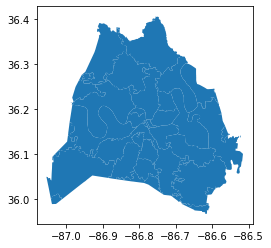

In [3]:
zipcodes.plot();

In [4]:
art_df = pd.read_csv('../data/art.csv')
print(art_df.shape)
art_df.head(3)

(164, 10)


,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location
0,Les Paul Guitar Mural,Hughes,Milree,"100 Broadway, Nashville TN",Painting,Mural,NaN,36.16240,-86.77491,"(36.1624, -86.77491)"
1,Sam Davis,LeQuire,Alan,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)"
2,The Flutist,Varo,Marton,"1 Symphony Place, Nashville TN",Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.15961,-86.77594,"(36.15961, -86.77594)"


In [5]:
art_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              164 non-null    object 
 1   Artist Last Name   164 non-null    object 
 2   Artist First Name  159 non-null    object 
 3   Location           164 non-null    object 
 4   Medium             162 non-null    object 
 5   Type               164 non-null    object 
 6   Description        107 non-null    object 
 7   Latitude           162 non-null    float64
 8   Longitude          162 non-null    float64
 9   Mapped Location    162 non-null    object 
dtypes: float64(2), object(8)
memory usage: 12.9+ KB


In [6]:
art_df['geometry'] = art_df.apply(lambda x: Point((x.Longitude, 
                                                         x.Latitude)), 
                                        axis=1)
art_df.head(3)

,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry
0,Les Paul Guitar Mural,Hughes,Milree,"100 Broadway, Nashville TN",Painting,Mural,NaN,36.16240,-86.77491,"(36.1624, -86.77491)",POINT (-86.77491000000001 36.1624)
1,Sam Davis,LeQuire,Alan,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)",POINT (-86.8366 36.12856)
2,The Flutist,Varo,Marton,"1 Symphony Place, Nashville TN",Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.15961,-86.77594,"(36.15961, -86.77594)",POINT (-86.77594000000001 36.15961)


In [7]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
art_geo = gpd.GeoDataFrame(art_df, 
                           crs = zipcodes.crs, 
                           geometry = art_df['geometry'])

In [9]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [10]:
art_by_zip = gpd.sjoin(art_geo, zipcodes, op = 'within')

In [11]:
art_by_zip.head()

,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry,index_right,zip,po_name
0,Les Paul Guitar Mural,Hughes,Milree,"100 Broadway, Nashville TN",Painting,Mural,NaN,36.16240,-86.77491,"(36.1624, -86.77491)",POINT (-86.77491 36.16240),36,37201,NASHVILLE
2,The Flutist,Varo,Marton,"1 Symphony Place, Nashville TN",Marble,Sculpture,"Statue commemorating Kenneth D Schermerhorn, M...",36.15961,-86.77594,"(36.15961, -86.77594)",POINT (-86.77594 36.15961),36,37201,NASHVILLE
11,Orpheus and Eurydice,Kaskey,Ray,"1 Symphony Place, Nashville TN",Limestone,Sculpture,Relief sculpture above main entrance of Scherm...,36.16017,-86.77575,"(36.16017, -86.77575)",POINT (-86.77575 36.16017),36,37201,NASHVILLE
21,The Birth of Apollo,Eskridge,Casey,"1 Symphony Place, Nashville TN",Bronze sculpture as centerpiece of fountain,Sculpture,"Two figures topping a fountain, one with a lyr...",36.15993,-86.77611,"(36.15993, -86.77611)",POINT (-86.77611 36.15993),36,37201,NASHVILLE
24,The Recording Angel,Flack,Audrey,"1 Symphony Place, Nashville TN",Bronze,Sculpture,Bronze angel holding a fountain pen and tablet,36.15920,-86.77571,"(36.1592, -86.77571)",POINT (-86.77571 36.15920),36,37201,NASHVILLE


In [12]:
art_by_zip['zip'].value_counts()

37219    33
37203    25
37201    21
37210    11
37212    10
37205    10
37206     9
37208     7
37214     6
37221     6
37209     4
37204     4
37115     3
37240     2
37213     2
37215     2
37207     2
37211     2
37216     2
37076     1
Name: zip, dtype: int64

In [13]:
art_in_37219 = art_by_zip.loc[art_by_zip['zip'] == '37219']
art_in_37219.shape

(33, 14)

In [14]:
polygon37219 = zipcodes.loc[zipcodes['zip'] == '37219']
polygon37219.shape


(1, 3)

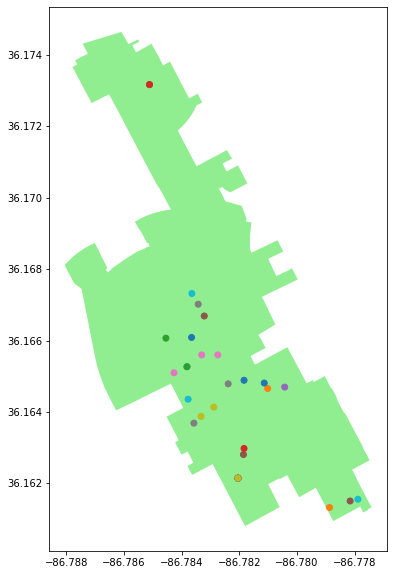

In [15]:
ax = polygon37219.plot(figsize = (8, 10), color = 'lightgreen')
art_in_37219.plot( ax = ax, column = 'Title');
plt.show();

In [16]:
center = polygon37219.geometry.centroid

C:\Users\16153\AppData\Local\Temp/ipykernel_12436/3507040512.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37219.geometry.centroid


In [17]:
area_center = [center.y, center.x]

In [18]:
map_37219 = folium.Map(location =  area_center, zoom_start = 12)
map_37219

In [19]:
art_in_37219['Type'].value_counts()

Sculpture    20
Mural         8
Frieze        2
Bronzes       1
Furniture     1
Mobile        1
Name: Type, dtype: int64

In [23]:
map_37219 = folium.Map(location =  area_center, zoom_start = 15)
folium.GeoJson(polygon37219).add_to(map_37219)
for row_index, row_values in art_in_37219.iterrows():
    if row_values.Type == "Sculpture":
        type_color = "green"
        icon = "fa-paint-brush"
    elif row_values.Type == "Mobile":
        type_color = "blue"
        icon = "fa-paint-brush"
    elif row_values.Type == "Mural":
        type_color = "orange"
        icon = "photo"
    elif row_values.Type == "Mosaic":
        type_color = "pink"
        icon = "sparkles"
    else:
        type_color = "purple"
        icon = "fa-paint-brush"
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Title']) + "- a " + str(row_values['Medium']) + " by " + str(row_values['Artist First Name']) + " " + str(row_values['Artist Last Name']) + '<br>' + str(row_values['Location'])
    icon = folium.Icon(color="%s" % type_color, icon= "%s" % icon, prefix='fa')
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 
    marker.add_to(map_37219)
    i+=1
map_37219.save('../maps/map37219.html')
map_37219

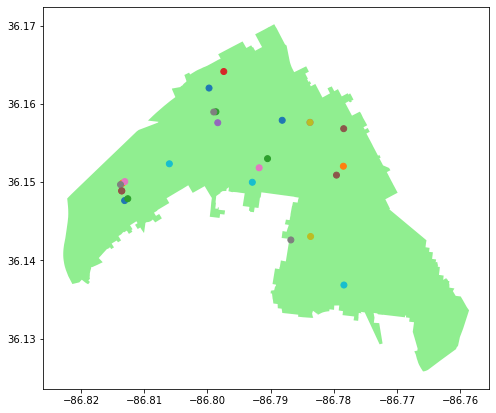

C:\Users\16153\AppData\Local\Temp/ipykernel_12436/1008573539.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37203.geometry.centroid


In [21]:
art_in_37203 = art_by_zip.loc[art_by_zip['zip'] == '37203']
polygon37203 = zipcodes.loc[zipcodes['zip'] == '37203']
ax = polygon37203.plot(figsize = (8, 10), color = 'lightgreen')
art_in_37203.plot( ax = ax, column = 'Title');
plt.show();
center = polygon37203.geometry.centroid
area_center = [center.y, center.x]
map_37203 = folium.Map(location =  area_center, zoom_start = 12)
map_37203

In [22]:
map_37203 = folium.Map(location =  area_center, zoom_start = 14)
folium.GeoJson(polygon37203).add_to(map_37203)
for row_index, row_values in art_in_37203.iterrows():
    if art_by_zip.Type[i] == "Sculpture":
        type_color = "green"
        icon = "fa-paint-brush"
    elif art_by_zip.Type[i] == "Mobile":
        type_color = "blue"
        icon = "fa-paint-brush"
    elif art_by_zip.Type[i] == "Mural":
        type_color = "orange"
        icon = "photo"
    elif art_by_zip.Type[i] == "Mosaic":
        type_color = "pink"
        icon = "sparkles"
    else:
        type_color = "purple"
        icon = "fa-paint-brush"
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Title']) + "- a " + str(row_values['Medium']) + " by " + str(row_values['Artist First Name']) + " " + str(row_values['Artist Last Name']) + '<br>' + str(row_values['Location'])
    icon = folium.Icon(color=f"{type_color}", icon= f"{icon}", prefix='fa')
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 
    marker.add_to(map_37203)
map_37203.save('../maps/map37203.html')
map_37203